<a href="https://colab.research.google.com/github/AnnJungChan/algorithm/blob/main/Sorting/sorting_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정렬 알고리즘

- 데이터를 특정한 기준에 따라서 순서대로 나열
- 오름차순, 내림차순
- 이진탐색을 위한 밑바탕, 이진탐색을 위한 전처리 과정
- 선택 정렬, 삽입 정렬, 퀵 정렬, 계수 정렬
- 알고리즘의 효율성에서 중요한 문제로 작용


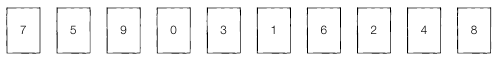

- 컴퓨터는 인간과 다르게 데이터의 규칙을 직관적으로 알 수 없음
- 어떻게 정렬할 것인지를 소스코드로 명명해야함
- 우선 오름차순으로 정렬을 시키면, 내림차순으로 정렬을 시키지 않아도 됨(그냥 reverse 쓰기!)

# 스와프

- 스와프는 파이썬에만 있는 유용한 두 객체의 값 바꾸기 함수
- 객체의 값을 변경할 때 유용하다

In [ ]:
array = [3,5]

array[0], array[1] = array[1], array[0]

print(array)

[5, 3]


array의 원소들이 서로 바뀐 것을 확인할 수 있다.

# 선택 정렬

- "가장 작은 것을 선택한다"의 의미
- 데이터가 무작위로 있을 때, 가장 작은 데이터를 선택해 맨 앞에 있는 데이터와 바꾸고, 그 다음 작은 데이터를 선택해 두 번째 데이터와 바꾸는 과정을 반복

** 단지 위치만 바꾸는 것이다! 다른 것을 바꾸는 것이 아닌 위치만 변경시킨다!! **

- 즉, 맨 앞에 있는 데이터와 가장 작은 데이터의 위치만 변경시킨다.

- 시간복잡도가 O(N^2)임
- 선택정렬의 경우 데이터의 갯수가 10,000개 이상이면 정렬 속도가 급격히 느려지는 것을 확인할 수 있음
- 매우 비효율적
- 코딩 테스트에서는 특정한 리스트에서 가장 작은 데이터를 찾는 일이 잦으므로 선택 정렬 소스코드 형태에 익숙해질 필요가 있다.

## 문제

[7,5,9,0,3,1,6,2,4,8]을 선택정렬을 이용해 오름차순으로 정렬하라.

### 풀이

- 스와프를 이용하라

In [ ]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(len(array)) :
    min_index = i

    for j in range(min_index + 1, len(array)) :
        if array[min_index]>array[j] :
            min_index = j
    array[i], array[min_index] = array[min_index], array[i]

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 삽입 정렬

- "데이터를 하나씩 확인하며, 각 데이터를 적절한 위치에 삽입하면 어떨까?"
- 선택 정렬에 비해 실행 시간 측면에서 더 효율적인 알고리즘
- 필요할 때만 위치를 바꾸기 때문에 데이터가 **거의 정렬되어 있을 때 훨씬 효율적**
- 특정한 데이터가 적절한 위치에 들어가기 이전에, 그 앞에까지의 데이터는 이미 정렬되어있다고 가정
- 정렬되어 있는 데이터의 리스트의 적절한 위치를 찾은 뒤에, 그 위치에 삽입된다는 점이 특징
- 삽입 정렬은 첫번째 데이터는 그 자체로 정렬되어 있다고 생각하기 때문에 두번째 데이터부터 시작
- 삽입 정렬에서는 특정 데이터의 왼쪽에 있는 데이터들은 이미 정렬된 상태이므로 자기보다 작은 데이터를 살펴볼 필요 없이 그 자리에 삽입됨
- 시간복잡도 : O(N^2)
- 반복문이 2번 중첩되어 사용됨
- 거의 정렬되어 있는 상태로 주어져있는 문제는 삽입정렬을 이용하자!

In [ ]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(1,len(array)) :
    for j in range(i,0,-1) :
        # 인덱스 i부터 1까지 감소하며 반복하는 문법
        if array[j]<array[j-1] :
            array[j], array[j-1] = array[j-1], array[j]
        else :
            # 자기보다 작은 데이터를 만나면 그 위치에서 멈춤
            break

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 퀵 정렬

- "기준 데이터를 설정하고 그 기준보다 큰 데이터와 작은 데이터의 위치를 바꾸면 어떨까?"
- 기준을 설정한 다음 큰 수와 작은 수를 교홚나 후, 리스트를 반으로 나누는 방식으로 동작
- 피벗 : 큰 숫자와 작은 숫자를 교환할 때, 교환하기 위한 기준
- 퀵 정렬을 수행하기 전에는 피벗을 어떻게 설정할 것인지 미리 명시해줘야함
- 호어분할 : "리스트에서 첫번째 데이터를 피벗으로 정한다"
- 피벗 설정 후에는 **왼쪽부터 피벗보다 큰 데이터**를 찾고, **오른쪽에서부터 피벗보다 작은 데이터**를 찾는다. 그 다음, 큰 데이터와 작은 데이터의 위치를 서로 교환해준다.
<br>
- 평균 시간 복잡도는 O(NlogN)
- 삽입 정렬과는 다르게, **이미 데이터가 정렬되어 있을 경우** 매우 느리게 작동
<br>
- 데이터가 정렬되어 있지 않음 : 삽입정렬
- 데이터가 정렬되어 있음 : 퀵 정렬
<br>
<br>
1. 호어분할 : 리스트에서 첫번째 데이터를 피벗으로 정한다.
2. 왼쪽에서부터는 피벗보다 큰 데이터를 찾고, 오른쪽에서는 피벗보다 작은 데이터를 찾는다. 그 후, 찾은 두 대상의 위치를 바꿔준다.
3. 결국, 피벗보다 큰 데이터 셋의 모임과 피벗보다 작은 데이터 셋의 모임으로 데이터가 2개로 분할되는 것을 확인할 수 있다.
4. 그 후, 각각의 파티션에 대해서도 또 다시 1~3을 반복한다.
5. 현재 리스트의 데이터가 1개일 때, 정렬이 종료된다.

5 7 9 0 3 1 6 2 4 8 \\
(5) [7] 9 0 3 1 6 2 [4] 8 <br>
각각 왼쪽에서는 피벗보다 큰 데이터를, 오른쪽에서는 피벗보다 작은 데이터를 찾는다. <br>
(5) [4] 9 0 3 1 6 2 [7] 8 <br>
두 데이터의 위치를 바꿔준다.

---
다시시작 \\
(5) 4 [9] 0 3 1 6 [2] 7 8 <br>
(5) 4 [2] 0 3 1 6 [9] 7 8 <br>

---
다시시작 \\
(5) 4 2 0 3 [1] <-> [6] 9 7 8 <br>
더이상 할 것이 없어서 교차되었음 \\
마지막 남은 원소 1과 5를 교환함

---

1 4 2 0 3 [5] 6 9 7 8 <br>

5보다 큰 데이터, 5보다 작은 데이터로 분할 된 사실을 알 수 있음

---

## 일반적인 퀵 정렬 알고리즘

In [ ]:
array = [5,7,9,0,3,1,6,2,4,8]

def quick_sort(array, start, end) :
    if start >= end :
        return
    pivot = start
    # 피벗을 첫번째 원소(호어분할)
    left = start + 1
    # left는 시작하는 원소
    # 호어 분할에서는 첫번째 원소가 피벗이므로, 첫번째 원소에 1을 더한 원소를 왼쪽 원소라고 칭함
    right = end
    # 오른쪽 원소는 가장 끝에 있는 원소

    # 이제 우리는 왼쪽에서는 피벗보다 큰 데이터를 찾고, 오른쪽에서는 피벗보다 작은 데이터를 찾는다

    while left <= right :
        # 피벗보다 큰 데이터를 찾을 때 까지 반복
        while left <= end and array[left] <= array[pivot] :
            # left <= end : left값이 end까지 갈 때 동안
            # 왼쪽의 값이 pivot값 보다 작다면, (우리는 왼쪽으로 가는 값은 pivot값 보다 커야 타겟으로 잡는다)
            left += 1
            # 그냥 지나간다와 같은 의미

        # 피벗보다 작은 데이터를 찾을 때 까지 반복
        while right > start and array[right] >= array[pivot] :
            # right > start : right는 오른쪽에서 왼쪽으로 오는 값인데,이 값이 시작값보다 크다면(계속 우리는 0이 될때까지 오른쪽으로만 간다)
            # 이 때, 오른ㅉ고으로 가는 값이 pivot의 값보다 크다면 (우리는 오른쪽으로 갈 때, pivot의 값보다 작은 것을 타겟으로 잡음)
            right -= 1
            # 그냥 지나간다는 의미
        if left > right :
            # 정렬이 끝남 (오른쪽이 왼쪽보다 크다)
            array[right], array[pivot] = array[pivot], array[right]
            # 정렬이 다 종료되었다면, 마지막 "right원소"와 "피벗 원소"를 교체시켜준다. 
        else :
            array[left], array[right] = array[right], array[left]
            # 일반조건에 대해서(pass 조건) 모두 지켜지지 않는 모든 경우에 대해서 left와 right의 순서 변경!
    
    quick_sort(array,start,right-1)
    # 그리고 right 기준으로 잘라서 왼쪽 퀵정렬
    quick_sort(array,right + 1, end)
    # right기준으로 잘라서 오른쪽 퀵 정렬

quick_sort(array,0,len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 파이썬에서의 퀵 정렬 알고리즘

In [ ]:
array = [8,7,9,0,3,1,6,2,4,8]

def quick_sort(array) :
    
    if len(array) <= 1:
        return array

    pivot = array[0] # 첫번째 원소는 피벗
    tail = array[1:] # 피벗을 제외한 리스트

    left_side = [x for x in tail if x<= pivot] # pivot보다 x가 작으면 모두 left side
    right_side = [x for x in tail if x > pivot] # pivot보다 x가 크면 모두 right side

    # 결론적으로는 피벗을 중심으로 left에는 작은 값이, right 에는 큰 값이 놓이게 되니까, 그냥 앞에 절차들 다 무시하고 결론만 생각

    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

    # 결론적으로 left와 right에서 계속 퀵 정렬을 반복함

print(quick_sort(array))

[0, 1, 2, 3, 4, 6, 7, 8, 8, 9]


# 계수 정렬

- 특정한 조건일 부합할 때만 사용할 수 있는 매우 빠른 정렬 알고리즘
- **데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때**만 사용
- 무한한 범위를 가지는 실수형 데이터가 주어지는 경우 계수 정렬은 사용하기 힘듬
- 가장 큰 데이터와 가장 작은 데이터의 차이가 1,000,000을 넘지 않을 때 효과적으로 사용
- 별도의 리스트를 선언하고 그 안에 정렬에 대한 정보를 담는다는 특징이 있음
- 시간복잡도 O(N+K)
-  N : 리스트의 길이
-  K : 데이터 수 만큼 반복
- 동일한 값이 여러개 등등할 때 적합 

7 5 9 0 3 1 6 2 9 1 4 8 0 5 2
---

1. 가장 큰 데이터와 가장 작은 데이터의 범위가 모두 담길 수 있도록 하나의 리스트를 생성 \\
- 가장 큰 데이터 : 9 \\
- 가장 작은 데이터 : 0 \\
- 우리가 정의할 리스트의 length : 0~9까지가 모두 들어갈 수 있는 크기의 리스트 -> 리스트의 크기가 10
- 이 때, 이 리스트의 숫자를 모두 0이라고 놓는다
<br>

[0 0 0 0 0 0 0 0 0 0]

---

2. 데이터를 하나씩 확인하며 데이터의 값과 동일한 인덱스의 데이터를 1씩 증가시키면 계수 정렬이 완료된다.
- 리스트에는 각 데이터가 몇번 등장했는지 그 횟수를 기록한다

0) [0 1 2 3 4 5 6 7 8 9]

1) [0 0 0 0 0 0 0 1 0 0]  7 \\
2) [0 0 0 0 0 1 0 1 0 0]  5 \\
3) [0 0 0 0 0 1 0 1 0 1]  9 \\
4) [1 0 0 0 0 1 0 1 0 1]  0 \\
5) [1 0 0 1 0 1 0 1 0 1]  3 \\
6) [1 1 0 1 0 1 0 1 0 1]  1 \\
... \\
15) [2 2 2 1 1 2 1 1 1 2] 2 \\

In [14]:
array = [7, 5, 9, 0, 3, 1, 6 ,2 ,9, 1, 4, 8, 5, 2]

# 리스트 초기회
# 1. 가장 큰 범위와 가장 작은 범위가 담길 수 있도록 리스트를 0으로 초기화

count = [0] * (max(array) + 1)

# 2. 각 해당하는 인덱스에서 그에 해당하면 count를 1씩 증가시킴
for i in range(len(array)) :
    count[array[i]] += 1

# 3. 리스트에 기록된 정렬정보로 정렬된 데이터 출력
for i in range(len(count)) :
    for j in range(count[i]) :
        print(i, end = " ")
        # 띄어쓰기 구분으로 등장한 만큼 리스트 출력

0 1 1 2 2 3 4 5 5 6 7 8 9 9 

# 정렬 라이브러리

- 최악의 경우에도 O(NlogN)의 시간 복잡도를 보장
- 병합 정렬과 삽입 정렬의 아이디어를 더한 하이브리드 방식의 정렬 알고리즘을 사용
- 단순히 정렬해야 되는 상황 : 제한 조건이 주어져있지 않다면, 정렬 라이브러리 사용
- 데이터 범위가 제한되어 있을 때 : 계수 정렬 사용

- sorted() : 퀵정렬보다 느리지만 최악의 경우어도 어느정도의 시간 복잡도를 보장, 리스트, 딕셔너리 자료형을 받아서 반환

In [15]:
array = [7,5,9,0,3,1,6,2,4,8]
result = sorted(array)
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


- sort() : 리스트 원소 안에 있는 내장함수, 그냥 그대로 정렬할 수 있음(다른 변수에 지정할 필요가 없음)

In [16]:
array = [7,5,9,0,3,1,6,2,4,8]
array.sort()
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


- sorted(), sort()의 key : 리스트의 데이터가 튜플로 구성되어 있을 때, key를 지정하여 정렬 할 수 있다.

In [23]:
array = [('바나나', 2), ('사과',5),('당근',3)]

def setting(data) :
    return data[1] # 파이썬은 0부터 시작

result = sorted(array, key = setting) # key에 함수를 넣어주면, 그 키에 맞게 데이터가 정렬됨
print(result)

[('바나나', 2), ('당근', 3), ('사과', 5)]
